In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


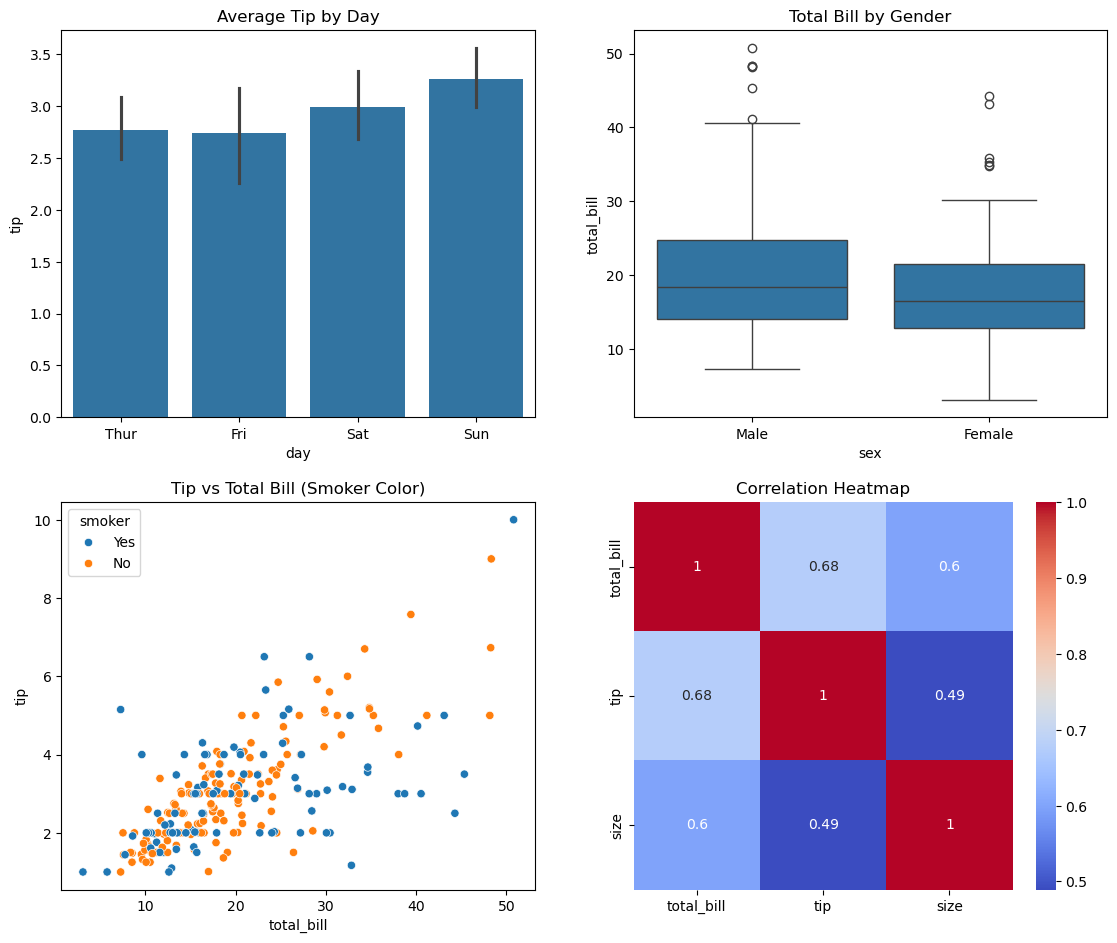

In [15]:
# Set up the grid
# pad control the space between plots
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
plt.tight_layout(pad = 4)

# Barplot: Average tip by day
# default to show average
# and the line represent the confidence interval
sns.barplot(data = data, x = 'day', y = 'tip', ax = axes[0, 0])
axes[0, 0].set_title('Average Tip by Day')

# Boxplot: Total bill distribution by gender
sns.boxplot(data = data, x = 'sex', y = 'total_bill', ax = axes[0, 1])
axes[0, 1].set_title('Total Bill by Gender')

# Scatterplot: Tip vs Total Bill (color by smoker)
sns.scatterplot(data = data, x = 'total_bill', y = 'tip', hue = 'smoker', ax = axes[1, 0])
axes[1, 0].set_title('Tip vs Total Bill (Smoker Color)')

# Heatmap: Correlation Matrix
# .corr stright up return a corelation table, how sweet.
corr = data.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.show()

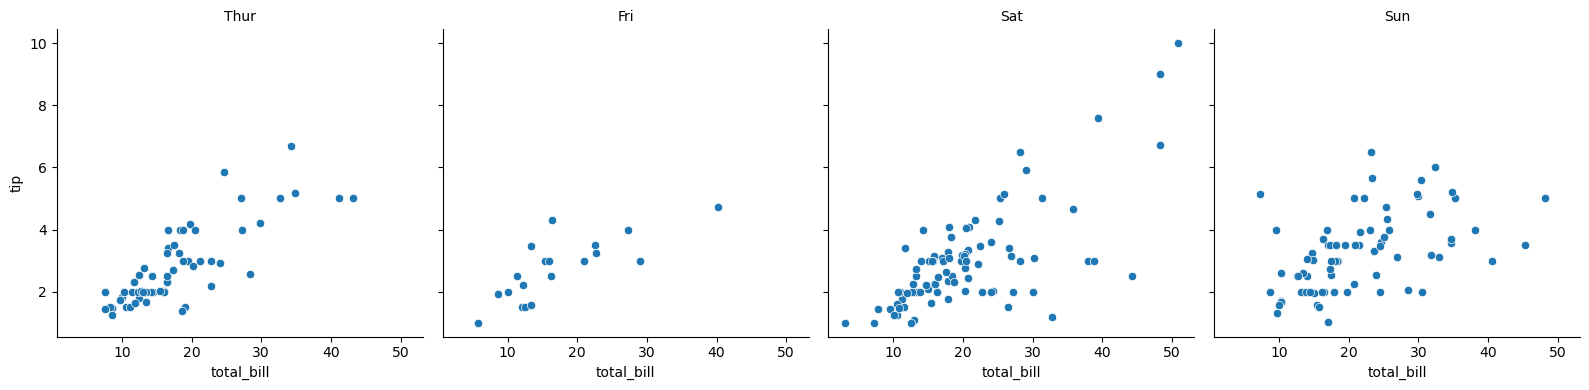

In [20]:
# Create the FacetGrid: one subplot per day
g = sns.FacetGrid(data, col = 'day', height = 4, aspect = 1)

# Map a scatterplot onto each
g.map(sns.scatterplot, 'total_bill', 'tip')

# Add a title to each
g.set_titles(col_template = "{col_name}")

plt.show()